<a href="https://colab.research.google.com/github/DanielRamosHoogwout/Portfolio/blob/main/us_medical_insurance_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### US Medical Insurance Costs
In this report we are going to bring some insights around the insurance costs that American citizens face during their lives.


*   Summary statistics
*   Let's see what lifestyle is the cheapest and also the most expensive one.
*   Make a prediction of the cost of insurance for an individual




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Lets see if there are any missing values:

In [3]:
print(df.isnull().values.any())
(df.isna().values.any())

False


False

Luckly we do not have missing values.

#### General statistics:


In [4]:

print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


We can observe that the mean is around 39 years old, with a bmi close to 31 (meaning that they are obese), with a child and paying an averege of 13270 in insurance costs.

Let's see the age distribution, the percentage of smokers and the percentage of children.

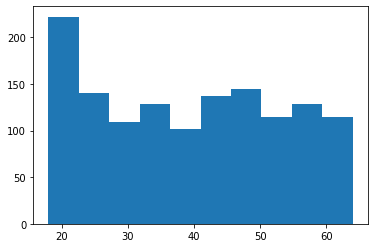

In [5]:
plt.hist(df.age, bins = 10)
plt.show()

We can observe that most frecuent age in this sample is around 20 years old.

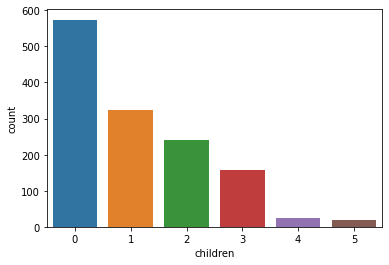

In [6]:
sns.countplot(data = df, x = 'children')

Most people in this sample have 0 children with is congruent with young people.

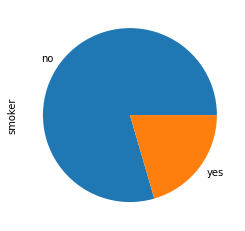

In [7]:


df.smoker.value_counts().plot(kind='pie')
plt.show()

Lets see a histogram to feel how charges are distributed:

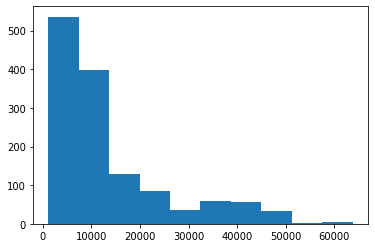

In [8]:
plt.hist(df.charges, bins = 10)
plt.show()

We se that most of the people less than 20000$, makes sense because the mayority has almost no children, they do not smoke and are young.

But what about BMI? Are americans overweight?

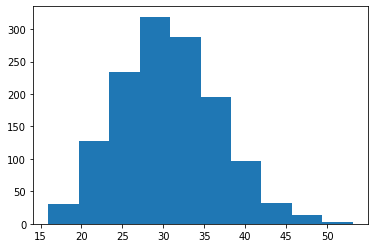

In [9]:
plt.hist(df.bmi)
plt.show()

Seems like a "Normal" dirstibution where the mean is around 30.
Remember that to be considered healthy bmi should be between 18.5 and 24.9
We can observe that see that most of the people hover around 30 so that means they are overweight or obese.

### Cheapest and most Expensive lifestyle

Let's see the outliers, what do we have to do to pay as little as possible?

In [11]:
print(df[df.charges == np.min(df.charges)])

     age   sex    bmi  children smoker     region    charges
940   18  male  23.21         0     no  southeast  1121.8739


We can see he is a male individual, with no children, non smoker and a healthy lifestyle.

On the other hand, let's see the most expensive charge:

In [12]:
print(df[df.charges == np.max(df.charges)])

     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801


Suprisingly the person that pays the most is not the oldest and has no children but she smokes and is extremely obese

### Predict insurance cost for an individual

We have to get the right data types before doing the linear regression.

In [17]:
 df.sex= df.sex.astype('category')
df.smoker = df.smoker.astype('category')
df.sex = df.sex.cat.codes
df.smoker = df.smoker.cat.codes
print(df.dtypes)

age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region       object
charges     float64
dtype: object


Now we can start to do the regression

In [28]:
from sklearn import linear_model
import statsmodels.api as sm

X = df[['age','sex','bmi','children','smoker']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['charges']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
new_age = 28
new_sex = 0
new_bmi = 23.4
new_children = 0
new_smoker = 0
print ('Predicted Insurance Cost: \n', regr.predict([[new_age, new_sex, new_bmi, new_children, new_smoker]]))




Intercept: 
 -12052.461985664719
Coefficients: 
 [  257.73498767  -128.63985357   322.36421449   474.41112061
 23823.39253065]
Predicted Insurance Cost: 
 [2707.44028805]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [29]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:05:34   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.0